# Задание по программированию: Размер случайного леса

## Вы научитесь:
- работать со случайным лесом — одним из наиболее распространенных семейств алгоритмов
- решать с его помощью задачи регрессии
- подбирать параметры случайного леса

## Введение
Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится **не на всей** обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается **не из всех возможных признаков**, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем **усреднения**.

Особенность случайного леса заключается в том, что он **не переобучается** по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья **не зависят** друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь **понижает уровень шума** в прогнозах.

## Реализация в Scikit-Learn
В библиотеке `scikit-learn` случайные леса реализованы в классах `sklearn.ensemble.RandomForestClassifier` (для классификации) и `sklearn.ensemble.RandomForestRegressor` (для регрессии). Обучение модели производится с помощью функции `fit`, построение прогнозов — с помощью функции `predict`. Число деревьев задается с помощью поля класса `n_estimators`.

Пример использования:


**`import numpy as np
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
predictions = clf.predict(X)`**

Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой R2 — по сути, это среднеквадратичная ошибка (MSE), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции `sklearn.metrics.r2_score`. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:

**`from sklearn.metrics import r2_score
print r2_score([10, 11, 12], [9, 11, 12.1])`**


## Инструкция по выполнению
В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: `data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))`
3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.
4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
# функция для записи ответов
def write_answer(name, answer):
    with open('data/' + name + '.txt', 'w') as file:
        file.write(str(answer))

#### Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [3]:
data = pd.read_csv('data/abalone.csv')

In [4]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1

In [7]:
#data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data['Sex'] = data['Sex'].map({'F':-1, 'I':0, 'M':1})

#### Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [11]:
X = data.drop('Rings', axis=1)
y = data['Rings']

#### Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). 
Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [23]:
%%time
list_RFRegressors = []
for n in np.arange(50) + 1:
    RFRegressor = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=1)
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    list_RFRegressors.append(cross_val_score(RFRegressor, X, y, cv=cv, scoring='r2').mean())

Wall time: 1min 27s


#### Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [24]:
for n, score in enumerate(list_RFRegressors):
    if score > 0.52:
        n_min052 = n +1
        break
n_min052

22

In [25]:
write_answer('forest_answer1', n_min052)

#### Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

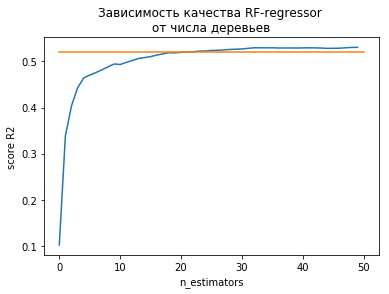

In [37]:
plt.plot(list_RFRegressors)
plt.ylabel('score R2')
plt.xlabel('n_estimators')
plt.title('Зависимость качества RF-regressor \nот числа деревьев')
plt.plot([0, 50], [0.52, 0.52]);